# Special Functions in Quantum Mechanics

## Motivation:

We have encountered a number of new and named functions in this class so far.  This has cause some confusion that I hope to alleviate with these notes.

## Learning Goals:

After working through these notes, you will be able to:

1. Identify and use the ***Associated Legendre Polynomials***
2. Employ the orthogonality relation of the ***Associated Legendre Polynomials***
3. Identify where ***Associated Legendre Polynomials*** show up in QM
4. Identify and us the ***Spherical Bessel Functions***
5. Employ the orthogonality relation of the ***Spherical Bessel Functions***
6. Identify where ***Spherical Bessel Functions*** show up in QM
7. Identify and use the ***Associated Laguerre Polynomials***
8. Identify where the ***Associated Laguerre Polynomials*** show up in QM

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Associated Legendre Polynomials

The ***Associated Legendre Polynomials*** show up as the solution to the differential equation stemming from the $\theta$ component of the Laplacian in spherical polar coordinates.  After solving for the $\phi$ component we end up with the equation
\begin{equation}
m^2 = \frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta,
\end{equation}
where $m=0,\pm 1, \pm 2, ... $ from the periodicity of $\phi$. Now make a change of variable $x = \cos\theta$ which yields $\frac{dx}{-\sin\theta}=d\theta$ and define $P(x) = \Theta(\theta)$.  Plugging these in and performing some rearrangements yields a differential equation that matches the ***general Legendre equation***
\begin{equation}
(1-x^2)\frac{d^2P(x)}{dx^2}-2x\frac{dP(x)}{dx}+\left[\beta-\frac{m^2}{1-x^2}\right]P(x) = 0
\end{equation}
It turns out that for $\Theta(\theta)$ to be continous $\beta=l(l+1)$ where $l=0,1,2...$.  Note that this also puts a limit on $m$ with $m=0,1, 2, ... , l$. 

The solutions, $P_l^m(x)$, to the above equation are known as the ***Associated Legendre Polynomials***.  The specific functional form of these functions depends on both indeces $m$ and $l$.  Index $l$ is referred to as the degree and $m$ is referred to as the order of the ***Associated Legendre Polynomial***.  The functions can be determined in a number of ways.  A recursive formula for these functions is:
\begin{equation}
P_l^m(x) = (-1)^m(1-x^2)^{m/2}\frac{d^m}{dx^m}P_l(x),
\end{equation}
where $P_l(x)$ are the ***Legendre polynomials***.  The ***Legendre polynomials*** are solutions to the ***Legendre equation*** which differs from the ***general Legendre equation*** by the exclusion of the $-\frac{m^2}{1-x^2}$ term.

In order to use the above equation to determine a specific functional form for the ***Associated Legendre Polynomials*** you need to know the target $m$ and $l$ as well as the ***Legendre polynomial*** $P_l(x)$.  There are a number of ways of defining these functions but perhaps the easiest way is the Rodriguez formula:
\begin{equation}
P_l(x) = \frac{1}{2^ll!}\frac{d^l}{dx^l}\left(x^2-1\right)^l
\end{equation}


In general, however, it is easier to just look up the specific function.  Below is a table of the first few ***Associated Lengedre polynomials*** followed by a plot of these functions

| $l$ | $m$ | $P_l^m(x)$|
| :-- | :-- | :-------- |
| 0   | 0   | $P_0^0(x) = 1$ |
| $1$   | $-1$  | $P_1^{-1}(x) = \frac{1}{2}\sqrt{1-x^2}$ |
| $1$   | $0$  | $P_1^{0}(x) = x$ |
| $1$   | $1$  | $P_1^{-1}(x) = -\sqrt{1-x^2}$ |

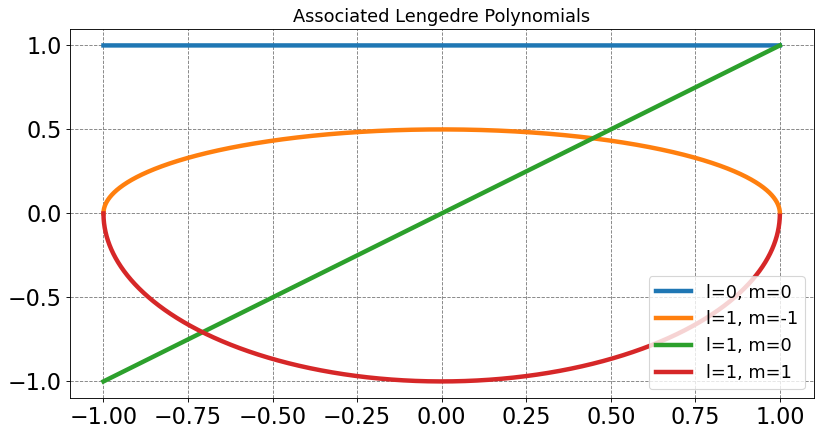

In [1]:
# plot of some of the Legendre polynomials
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import lpmv
x = np.arange(-1,1,0.0001)
plt.figure(figsize=(12,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
for l in range(2):
    for m in range(-l,l+1):
        label = "l=" + str(l) + ", m=" + str(m)
        plt.plot(x,lpmv(m,l,x),lw=4,label=label)
plt.title("Associated Lengedre Polynomials",fontsize=16)
plt.legend(fontsize=16);

### Orthogonality of the Associated Legendre Polynomials

The ***Associated Legendre Polynomials*** have the following orthogonality rules over the domain $-1 \leq x \leq 1$:

\begin{equation}
\left\langle P_l^m|P_{l'}^m \right\rangle = \int_{-1}^{1} P_l^m(x)P_{l'}^m(x)dx = \frac{2(l+m)!}{(2l+1)(l-m)!}\delta_{l,l'}
\end{equation}

That being that if $m$ is kept constant, then an Associated Legendre Polynomial of one $l$ value is orthogonal to an Associated Legendre Polynomial with a different $l$ value.  A more general orthogonality relationship does not exist.  As you can see from the table below, certain pairs of Associated Legendre Polynomials are not orthogonal (e.g. $P_0^0$ and $P_1^1$).

In [6]:
from scipy import integrate
from scipy.special import lpmv
import numpy as np
from scipy.special import factorial

def theta_norm(m,l):
    return np.sqrt(((2*l+1)*factorial(l-np.abs(m)))/(2*factorial(l+np.abs(m))))
def integrand(theta,m1,l1,m2,l2):
    return theta_norm(m1,l1)*lpmv(m1,l1,theta)*theta_norm(m2,l2)*lpmv(m2,l2,theta)

print ("{:<8} {:<8} {:<8} {:<8} {:<20}".format('l','m','l\'','m\'','<Theta_ml | Theta_m\'l\'>'))
print("-------------------------------------------------------------------------")
for l1 in range(3):
    for m1 in range(l1+1):
        for l2 in range(l1,3):
            for m2 in range(l2+1):
                print ("{:<8} {:<8} {:<8} {:<8} {:<20}".format(l1,m1,l2,m2,np.round(integrate.quad(integrand,-1,1,args=(m1,l1,m2,l2))[0],3)))

l        m        l'       m'       <Theta_ml | Theta_m'l'>
-------------------------------------------------------------------------
0        0        0        0        1.0                 
0        0        1        0        0.0                 
0        0        1        1        -0.962              
0        0        2        0        0.0                 
0        0        2        1        -0.0                
0        0        2        2        0.913               
1        0        1        0        1.0                 
1        0        1        1        0.0                 
1        0        2        0        0.0                 
1        0        2        1        -0.931              
1        0        2        2        -0.0                
1        1        1        0        -0.0                
1        1        1        1        1.0                 
1        1        2        0        0.269               
1        1        2        1        0.0                 
1        1 

### Use in Quantum Mechanics

The use of ***Associated Legendre Polynomials*** in quantum mechanics is obscured because of their inclusion in the spherical harmonics.  These functions account for both the $\theta$ and $\phi$ components with the $\theta$ component being the Associated Legendre Polynomials.  The orthogonality of these functions combined with the $\phi$ solutions is what yields the orthogonality of the spherical harmonics.  

The normalized spherical harmonics are given by
\begin{equation}
 Y_l^m = \sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(\cos\theta)e^{im\phi}
\end{equation},
where $P_l^{|m|}(\cos\theta)$ is the ***Associated Legendre Polynomial*** of degree $l$ and order $|m|$.

These functions do form a complete orthonormal basis for the space of $\theta$ and $\phi$.  The orthonormality relationship for these functions is given as

\begin{equation}
\left\langle Y_l^m | Y_{l'}^{m'} \right\rangle = \delta_{l,l'}\delta_{m,m'}
\end{equation}

Notice that the above orthogonality of the spherical harmonics and the lack of orthogonality of the ***Associated Legendre Polynomials*** when $m\neq m'$ requires that the $\phi$ component be orthogonal when $m\neq m'$.  We can demonstrate that with code (below) or simply recognize that
\begin{equation}
\int_0^{2\pi} e^{i(m-m')\phi}d\phi = 2\pi\delta_{m,m'}
\end{equation}

In [4]:
from scipy import integrate
from scipy.special import lpmv
import numpy as np

def phi_norm2():
    return 1/(2*np.pi)
def real_integrand(phi,m1,m2):
    return phi_norm2()*np.cos((m1-m2)*phi)
def im_integrand(phi,m1,m2):
    return phi_norm2()*np.sin((m1-m2)*phi)

print ("{:<8} {:<8} {:<30} {:<30}".format('m','m\'','Re<Phi_m | Phi_m\'>','Im<Phi_m | Phi_m\'>'))
print("--------------------------------------------------------------------")
for m1 in range(4):
    for m2 in range(m1,4):
        print ("{:<8} {:<8} {:<30} {:<30}".format(m1,m2,np.round(integrate.quad(real_integrand,0,2*np.pi,args=(m1,m2))[0],3),np.round(integrate.quad(im_integrand,0,2*np.pi,args=(m1,m2))[0],3)))

m        m'       Re<Phi_m | Phi_m'>             Im<Phi_m | Phi_m'>            
--------------------------------------------------------------------
0        0        1.0                            0.0                           
0        1        0.0                            -0.0                          
0        2        -0.0                           0.0                           
0        3        -0.0                           -0.0                          
1        1        1.0                            0.0                           
1        2        0.0                            -0.0                          
1        3        -0.0                           0.0                           
2        2        1.0                            0.0                           
2        3        0.0                            -0.0                          
3        3        1.0                            0.0                           


## Spherical Bessel Functions

The ***Spherical Bessel Functions*** show up as the solutions to the radial component of the [particle in a sphere](particle_in_a_sphere.ipynb).   In our solution for the radial component, $r$, we started with an equation that resembled
\begin{equation}
\frac{\hbar^2}{R(r)}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) + 2mr^2E = \hbar^2l(l+1)
\end{equation} 
where the $l(l+1)$ part comes from the angular solutions.  Rearranging yields
\begin{equation}
\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) + \left(\frac{2mE}{\hbar^2}r^2 - l(l+1)\right)R(r) = 0
\end{equation} 
Now expanding the first term using the product rule we get
\begin{align}
&\left(r^2\frac{\partial^2R(r)}{\partial r^2} + 2r\frac{\partial R(r)}{\partial r}\right) + \left(\frac{2mE}{\hbar^2}r^2 - l(l+1)\right)R(r) = 0 \\
&r^2\frac{\partial^2R(r)}{\partial r^2} + 2r\frac{\partial R(r)}{\partial r} + \left(\frac{2mE}{\hbar^2}r^2 - l(l+1)\right)R(r) = 0
\end{align}
The above expression resembles a differential equation of the form 
\begin{equation}
x^2\frac{d^2y(x)}{d x^2} + 2x\frac{d y(x)}{d x} + \left(x^2 - l(l+1)\right)y(x) = 0,
\end{equation}
that has the ***spherical Bessel functions*** as the solutions.  To get the final manipulation we must set $x^2= \frac{2mE}{\hbar^2}r^2$ or $x = \frac{\sqrt{2mE}}{\hbar}r$.   Additionally, we introduce a new function $y(x) = R(r)$ and recognize that 
\begin{align}
\frac{d y(x)}{dx} &= \frac{dr}{dx}\frac{dR(r)}{dr} \\
\frac{d^2 y(x)}{dx^2} &= \frac{dr}{dx}\frac{dr}{dx}\frac{d^2R(r)}{dr^2}
\end{align}
or
\begin{align}
\frac{dR(r)}{dr} &=  \frac{dx}{dr}\frac{d y(x)}{dx} \\
\frac{d^2R(r)}{dr^2} &= \left(\frac{dx}{dr}\right)^2\frac{d^2 y(x)}{dx^2}
\end{align}
Thus, we can see that our final radial differential equation will be exactly of the form for which the ***spherical Bessel functions*** are the solutions.  Note, however, that the independent variable is actually $x = \frac{\sqrt{2mE}}{\hbar}r$.

The ***spherical Bessel functions*** have two types.  We will ignore the second type because it can be discarded as a solution to our problem due to postulate 1 of quantum mechanics (the function is not finite in the domain).  The spherical Bessel functions of the first type are denoted $j_l(x)$ as the specific functional form of these depends on the index $l$.  These functions are related to the ***ordinary Bessel functions*** of the first type, $J_l(x)$, by the following relationship
\begin{equation}
j_l(x) = \sqrt{\frac{\pi}{2x}}J_{l+\frac{1}{2}}(x)
\end{equation}

The spherical Bessel functions can also be determined using ***Rayleigh's formula*** for them:
\begin{equation}
j_l(x) = (-x)^l\left(\frac{1}{x}\frac{d}{dx}\right)^l\frac{\sin x}{x}
\end{equation}
The above equation can be used to determine the spherical Bessel function of the first type for integer $l$.  It is likely easier, however, to look up a table of these such as the one given below

| $l$  | $j_l(x)$|
| :---  | :-------- |
| 0    | $j_0(x) = \frac{\sin x}{x}$ |
| $1$  | $j_1(x) = \frac{\sin x}{x^2} - \frac{\cos x}{x}$ |
| $2$   |$j_2(x) = \left(\frac{3}{x^2} - 1 \right)\frac{\sin x}{x} - \frac{3\cos x}{x^2}$  |

In [1]:
#### import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import spherical_jn, spherical_yn
fontsize = 20
x = np.arange(0.0, 10.0, 0.01)
fig, ax = plt.subplots(1,2,figsize=(20,8),dpi= 80, facecolor='w', edgecolor='k')
ax[0].set_ylim(-0.5, 1.1)
ax[0].set_title(r'$j_l$', fontsize=2*fontsize)
ax[0].set_xlabel(r'$x$',size=fontsize)
ax[0].set_ylabel(r'$j_l(x)$',size=fontsize)
ax[0].tick_params(axis='both',labelsize=fontsize)
for n in np.arange(0, 4):
    ax[0].plot(x, spherical_jn(n, x), lw = 3, label=rf'$l={n}$')
ax[0].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax[0].legend(loc='best',fontsize=fontsize)
# second type
ax[1].set_ylim(-1, 1)
ax[1].set_title(r'$y_l$',fontsize=2*fontsize)
for n in np.arange(0, 4):
    ax[1].plot(x, spherical_yn(n, x), lw = 3, label=rf'$l={n}$')
ax[1].set_xlabel(r'$x$',size=fontsize)
ax[1].set_ylabel(r'$y_l(x)$',size=fontsize)
ax[1].tick_params(axis='both',labelsize=fontsize)
ax[1].legend(loc='best',fontsize=fontsize)
ax[1].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
plt.show();

NameError: name 'np' is not defined

### The Zeros of the Spherical Bessel Functions

The values of $x$ for which 
\begin{equation}
j_l(x) = 0
\end{equation}
are important for the problem of particle in a sphere because the boundary conditions of the problem dictate that 
\begin{equation}
R(r_0) = 0
\end{equation}
for the sphere radius $r_0$.  

As may be evident in the plot above, each $j_l(x)$ function will continue to oscillate as $x\rightarrow\infty$.  This means that there will be an infinite number of $x$ positions at which $j_l(x)=0$.  We will denote these $x$ values as $\beta_{n,l}$, or the $n$th $x$ value for which $l$th spherical Bessel function crosses zero.   There is no easy way to determine these values for arbitrary $l$ so we just tabulate them

| l\n  | 1    |  2   |  3   | 4    |  
|:---- | :--- | :--- | :--- | :--- |
| 0    | $\pi$| $2\pi$| $3\pi$ | $4\pi$|
| 1    | 4.493| 7.725 | 10.904 | 14.066 |
| 2    | 5.763| 9.095 | 12.322 | 15.515 |

When we use these zeros and solve for the energy etc, we get that the radial wavefunction for the particle in a sphere has the form
\begin{equation}
R_{l,n}(r) = Aj_l\left(\frac{\beta_{n,l}}{r_0}r\right)
\end{equation}

### Orthogonality of the Spherical Bessel Functions

The ***spherical Bessel Functions***, $j_l\left(\frac{\beta_{n,l}r}{r_0}\right)$ are orthogonal for different $n$ and constant $l$ over the domain $0 \leq r < r_0$.  This orthonormality can be expressed as follows
\begin{equation}
\left\langle j_l\left(\frac{\beta_{n,l}}{r_0}r\right) | j_{l}\left(\frac{\beta_{n',l}}{r_0}r\right)\right\rangle = \int_0^{r_0} j_l\left(\frac{\beta_{n,l}}{r_0}r\right) j_{l}\left(\frac{\beta_{n',l}}{r_0}r\right) r^2dr = \frac{r_0^3\delta_{nn'}}{2}\left[ j_{l+1}(\beta_{n,l})\right]
\end{equation}
Notice that this orthonormality is for the different zeros of the same spherical Bessel function.  The orthogonality of different $l$s is not guaranteed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import spherical_jn
from scipy import integrate
%matplotlib inline
from scipy.optimize import root
    
def integrand(r,n1,l1,n2,l2):
    zero_l1n1 = spherical_jn_zero(l1, n1)
    zero_l2n2 = spherical_jn_zero(l2, n2)
    return r_norm(n1,l1)*spherical_jn(l1, r*zero_l1n1)*r_norm(n2,l2)*spherical_jn(l2, r*zero_l2n2)*r**2
def r_norm(n,l):
    zero_ln = spherical_jn_zero(l, n)
    return np.sqrt(2)/(spherical_jn(l+1, zero_ln))
    
    
def spherical_jn_zero(l, n, ngrid=100):
    """Returns nth zero of spherical bessel function of order l
    """
    if l > 0:
        # calculate on a sensible grid
        x = np.linspace(l, l + 2*n*(np.pi * (np.log(l)+1)), ngrid)
        y = spherical_jn(l, x)
    
        # Find m good initial guesses from where y switches sign
        diffs = np.sign(y)[1:] - np.sign(y)[:-1]
        ind0s = np.where(diffs)[0][:n]  # first m times sign of y changes
        x0s = x[ind0s]
    
        def fn(x):
            return spherical_jn(l, x)

        return [root(fn, x0).x[0] for x0 in x0s][-1]
    else:
        return n*np.pi
print ("{:<8} {:<8} {:<8} {:<8} {:<30}".format('n','l','n\'','l\'','<j_l(b_nl r) | j_l\'(b_n\'l\' r)>'))
print("--------------------------------------------------------------------")
for l1 in range(3):
    for n1 in range(1,4):
        for l2 in range(3):
            for n2 in range(1,4):
                print ("{:<8} {:<8} {:<8} {:<8} {:<30}".format(n1,l1,n2,l2,np.round(integrate.quad(integrand,0,1,args=(n1,l1,n2,l2))[0],3)))    

n        l        n'       l'       <j_l(b_nl r) | j_l'(b_n'l' r)>
--------------------------------------------------------------------
1        0        1        0        1.0                           
1        0        2        0        0.0                           
1        0        3        0        -0.0                          
1        0        1        1        0.959                         
1        0        2        1        -0.242                        
1        0        3        1        0.112                         
1        0        1        2        0.89                          
1        0        2        2        -0.368                        
1        0        3        2        0.196                         
2        0        1        0        0.0                           
2        0        2        0        1.0                           
2        0        3        0        0.0                           
2        0        1        1        0.279                   

In [15]:
def j1(x):
    return np.sin(x)/x**2 - np.cos(x)/x
def j2(x):
    return (3/x**2-1)*np.sin(x)/x - 3*np.cos(x)/x**2
def r_int(x):
    zero_41 = spherical_jn_zero(1, 4)
    norm = 2/j2(zero_41)**2
    return x**3*j1(zero_41*x)**2
def int1(x,beta):
    return np.sin(beta*x)**2/(beta**4*x)
def int2(x,beta):
    return x*np.cos(beta*x)**2/(beta**2)
def int3(x,beta):
    return 2*np.sin(beta*x)*np.cos(beta*x)/beta**3
print("int1:", integrate.quad(int1,0,1,args=(zero_41))[0])
print("int2:", integrate.quad(int2,0,1,args=(zero_41))[0])
print("int3:", integrate.quad(int3,0,1,args=(zero_41))[0])
print(2/(spherical_jn(2, zero_41)**2)*(integrate.quad(int1,0,1,args=(zero_41))[0] + integrate.quad(int2,0,1,args=(zero_41))[0] - integrate.quad(int3,0,1,args=(zero_41))[0]))
print(integrate.quad(r_int,0,1)[0])
print(2/(spherical_jn(2, zero_41)**2)*1.294e-3)

int1: 4.9911975147348385e-05
int2: 0.0012698875933548103
int3: 2.5415821093449187e-05
0.5147966377079543
0.0012943837474087094
0.51464401536846


In [9]:

def r_integrand(r,n,l):
    zero_ln = spherical_jn_zero(l, n)
    r_norm = 2/spherical_jn(l+1, zero_ln)**2
    return r_norm*spherical_jn(l, zero_ln*r)**2*r**3
print(integrate.quad(r_integrand,0,1,args=(4,1))[0])

0.5147966377079543


In [3]:
zero_41 = spherical_jn_zero(1, 4)
print(zero_41)
print("j_2(beta_41) = ", spherical_jn(2, zero_41))

14.066193912831473
j_2(beta_41) =  -0.07091345945046217


### Use in Quantum Mechanics

The spherical Bessel functions are the solutions to the radial component of the particle in a sphere.  The ordinary Bessel functions are the solutions to the radial component of the particle in a disc/circle.  These functions show up in spherically symmetric bounded problems with no potential. We are unlikely to encounter them again in this class.

## The Associated Laguerre Polynomials

The ***Associated Laguerre Polynomials*** are a component of the radial solution to the hydrogen atom Schrodinger equation.  After solving the angular component, the following differential equation can be achieved

$-\frac{\hbar^2}{2m_er^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)+\left[\frac{\hbar^2l(l+1)}{2m_er^2} + V(r)-E\right]R(r) =0 $.

This can be solved using power series solutions to differential equations but we will not go through it. Instead we will present the energies and wavefunctions

$E_n = - \frac{m_ee^4}{8\epsilon_0^2h^2n^2} = - \frac{e^2}{8\pi\epsilon_0a_0n^2}$

for $n=1,2,...$ and $a_0 = \frac{\epsilon_0h^2}{\pi m_ee^2}$ is the Bohr radius.  These are actually the same energies obtained from the Bohr model of the hydrogen atom.  Also notice that the energies are independent of $l$.  It should be noted that $n\geq l+1 $ or $0 \leq l \leq n-1$ for $n=1,2,..$.  

The radial wavefunction solution to the equation above is given as 

$R_{nl} = A_r r^le^{-r/na_0}L_{n+l}^{2l+1}\left( \frac{2r}{na_0}\right)$,

where $L_{n+l}^{2l+1}$ are the ***associated Laguerre polynomials***. Here is a table of the first few examples of these functions

|   $n, l$       | $L_{n+l}^{2l+1}(x)$ |
| :---------- | :---------------- |
| $1, 0$           | $L_1^1(x)= -1$ |
| $2, 0$          | $L_2^1(x)= -2(2-x)$ |
| $2, 1$            | $L_3^3(x)= -3!$ |
| $3, 0$          | $L_3^1(x)= -3!(3-3x+\frac{1}{2}x^2)$ |
| $3, 1$            | $L_4^3(x)= -4!(4-x)$ |
| $3, 2$          | $L_5^5(x)= -5!$ |


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


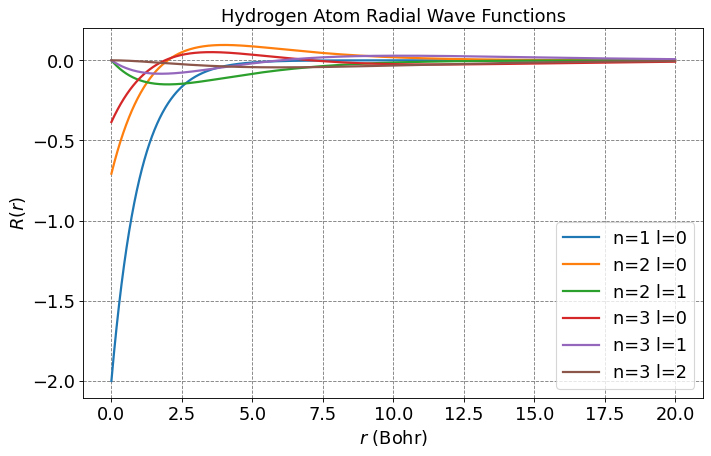

In [3]:
# let's plot some radial wavefunctions of the hydrogen atom
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
fontsize = 16
plt.figure(figsize=(10,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=fontsize)
plt.grid(which='major', axis='both', color='#808080', linestyle='--')
plt.title("Hydrogen Atom Radial Wave Functions",fontsize=fontsize)
plt.legend(fontsize=fontsize);
# parameters for plotting
nLimit = 3
a0 = 1.0
r = np.arange(0,20,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        label = "n=" + str(n) + " l=" + str(l)
        plt.plot(r,R,label=label,lw=2)
plt.legend(fontsize=fontsize)
plt.xlabel(r'$r$ (Bohr)',size=fontsize)
plt.ylabel(r'$R(r)$',size=fontsize)
plt.show();

### Limited Orthogonality of the Laguerre Polynomials

The generalized Laguerre polynomials are not orthogonal themselves but are orthogonal over $[0,\infty)$ with weighting function $x^\alpha e^{-x}$.  That is

\begin{equation}
\int_0^\infty x^\alpha e^{-x} L_n^{(\alpha)}(x)L_m^{(\alpha)}(x)dx = \frac{\Gamma(n+\alpha+1)}{n!}\delta_{n,m}
\end{equation}

where $\Gamma$ is the gamma function and $\delta_{n,m}$ is defined by
\begin{equation}
\delta_{n,m} = \begin{cases} 1 \quad\text{ if }n=m \\ 0 \quad\text{ otherwise}\end{cases}
\end{equation}

That particular orthogonality condition is not that useful for us but it can also be shown that
\begin{equation}
\int_0^\infty x^{(\alpha+1)} e^{-x} L_n^{(\alpha)}(x)L_m^{(\alpha)}(x)dx = \frac{2n[(n+\frac{\alpha-1}{2})!]^3}{(n-\frac{(\alpha-1)}{2}-1)!}\delta_{n,m}
\end{equation}

This relationship indicates that any two hydrogen atom wave functions differing in primary quantum number $n$ and not $l$ will be orthogonal.  We will see that demonstrated in the table below


In [4]:
import numpy as np
from scipy import integrate
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_radial_wf(r,n,l):
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    return R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
def integrand(r,n1,l1,n2,l2):
    return r*r*hydrogen_atom_radial_wf(r,n1,l1)*hydrogen_atom_radial_wf(r,n2,l2)

print ("{:<10} {:<10} {:<10} {:<10} {:<20}".format('n', 'l', 'n\'', 'l\'', '<R_nl | R_n\'l\'>'))
print("--------------------------------------------------------------------")
for n1 in range(1,4):
    for l1 in range(n1):
        for n2 in range(1,4):
            for l2 in range(n2):
                print ("{:<10} {:<10} {:<10} {:<10} {:<20}".format(n1, l1, n2, l2, np.round(integrate.quad(integrand,0,np.infty,args=(n1,l1,n2,l2))[0],3)))

n          l          n'         l'         <R_nl | R_n'l'>     
--------------------------------------------------------------------
1          0          1          0          1.0                 
1          0          2          0          -0.0                
1          0          2          1          0.484               
1          0          3          0          -0.0                
1          0          3          1          0.23                
1          0          3          2          0.103               
2          0          1          0          -0.0                
2          0          2          0          1.0                 
2          0          2          1          -0.866              
2          0          3          0          0.0                 
2          0          3          1          0.213               
2          0          3          2          -0.761              
2          1          1          0          0.484               
2          1         

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import spherical_jn
from scipy import integrate
%matplotlib inline
from scipy.optimize import root
    
def integrand(r,n1,l1,n2,l2):
    zero_l1n1 = spherical_jn_zero(l1, n1)
    zero_l2n2 = spherical_jn_zero(l2, n2)
    return spherical_jn(l1, r*zero_l1n1)*spherical_jn(l2, r*zero_l2n2)*r**2
def integrand_norm(r,n1,l1,n2,l2):
    zero_l1n1 = spherical_jn_zero(l1, n1)
    zero_l2n2 = spherical_jn_zero(l2, n2)
    return r_norm(n1,l1)*r_norm(n2,l2)*spherical_jn(l1, r*zero_l1n1)*spherical_jn(l2, r*zero_l2n2)*r**2
def integrand_r3(r,n1,l1,n2,l2):
    zero_l1n1 = spherical_jn_zero(l1, n1)
    zero_l2n2 = spherical_jn_zero(l2, n2)
    return spherical_jn(l1, r*zero_l1n1)*spherical_jn(l2, r*zero_l2n2)*r**3
def r_norm(n,l):
    zero_ln = spherical_jn_zero(l, n)
    return np.sqrt(2)/(spherical_jn(l+1, zero_ln))
    
    
def spherical_jn_zero(l, n, ngrid=100):
    """Returns nth zero of spherical bessel function of order l
    """
    if l > 0:
        # calculate on a sensible grid
        x = np.linspace(l, l + 2*n*(np.pi * (np.log(l)+1)), ngrid)
        y = spherical_jn(l, x)
    
        # Find m good initial guesses from where y switches sign
        diffs = np.sign(y)[1:] - np.sign(y)[:-1]
        ind0s = np.where(diffs)[0][:n]  # first m times sign of y changes
        x0s = x[ind0s]
    
        def fn(x):
            return spherical_jn(l, x)

        return [root(fn, x0).x[0] for x0 in x0s][-1]
    else:
        return n*np.pi

print(np.round(integrate.quad(integrand_norm,0,1,args=(2,1,2,1))[0],10))
print(np.round(integrate.quad(integrand,0,1,args=(2,1,2,1))[0],10))
print(np.round(integrate.quad(integrand_r3,0,1,args=(2,1,2,1))[0],10))

1.0
0.008240013
0.0044444399


In [12]:
print(r_norm(2,1)**(2))
beta_21 = spherical_jn_zero(1,2)
print(spherical_jn(2,beta_21)**2)
print(2/spherical_jn(2,beta_21)**2)

121.35903188821808
0.01648002599297405
121.35903188821806


### Use in Quantum Mechanics

The ***Associated Laguerre Polynomials*** show up in the radial solution to the hydrogen atom.  They are a component of our understanding of radial wavefunctions for atoms and are thus extremely important.  They may come up as basis functions in approximation methods for many electron atoms.